In [1]:
import h5py
import numpy as np
import glob
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics.cluster import adjusted_rand_score
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

/cluster/work/bewi/members/tuncel/anaconda3/envs/r-3.4.1-env/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
loc_values = [0.25, 0.5, 0.75, 1, 1.25, 1.5, 2, 2.5, 3, 3.5, 4]

In [10]:
loc_values

[0.25, 0.5, 0.75, 1, 1.25, 1.5, 2, 2.5, 3, 3.5, 4]

In [11]:
def evaluate_once(loc_value):
    loom_file_path =  '../simulated/6_groups/melanomaS2_sim_loc'+str(loc_value)+'.h5'
    dim_red_results_path = sorted(glob.glob('../simulated/6_groups/analysis/*/melanomaS2_sim_loc'+str(loc_value)+'.csv'))
    cluster_results_path = sorted(glob.glob('../simulated/6_groups/analysis/*/clusters/melanomaS2_sim_loc'+str(loc_value)+'clusters.csv'))
    h5f = h5py.File(loom_file_path, 'r')
    cell_groups = h5f['cell_groups'].value
    h5f.close()
    vfunc1 = np.vectorize(lambda t: t.decode('UTF-8'))
    cell_groups = vfunc1(cell_groups)
    vfunc2 = np.vectorize(lambda t: int(t[-1:]))
    cell_groups = vfunc2(cell_groups)
    # cluster results
    cluster_results = []
    for c in cluster_results_path:
        cluster_results.append(np.genfromtxt(c, delimiter=',', dtype=np.int64))   

    results = []
    i = 0
    for cr in cluster_results:
        #print (cluster_results_path[i])
        #print ('nmi')
        i = i + 1
        #print(normalized_mutual_info_score(cell_groups, cr))
        results.append(normalized_mutual_info_score(cell_groups, cr))
    #print(cluster_results_path)
    vfunc2 = np.vectorize(lambda t: t.split('/')[4])
    index_list = vfunc2(cluster_results_path)
    print(index_list)
    return pd.Series(results, index=index_list)

In [12]:
index = evaluate_once(0.5).T.index.values

['block_zifa' 'factor_analysis' 'griph' 'pca' 'phenograph' 'simlr' 'tsne']


In [13]:
df = pd.DataFrame(columns=index)
for loc in loc_values:
    df.loc[loc] = evaluate_once(loc)
    #df.append(evaluate_once(loc),ignore_index=True)

['block_zifa' 'factor_analysis' 'griph' 'pca' 'phenograph' 'simlr' 'tsne']
['block_zifa' 'factor_analysis' 'griph' 'pca' 'phenograph' 'simlr' 'tsne']
['block_zifa' 'factor_analysis' 'griph' 'pca' 'phenograph' 'simlr' 'tsne']
['block_zifa' 'factor_analysis' 'griph' 'pca' 'phenograph' 'simlr' 'tsne']
['block_zifa' 'factor_analysis' 'griph' 'pca' 'phenograph' 'simlr' 'tsne']
['block_zifa' 'factor_analysis' 'griph' 'pca' 'phenograph' 'simlr' 'tsne']
['block_zifa' 'factor_analysis' 'griph' 'pca' 'phenograph' 'simlr' 'tsne']
['block_zifa' 'factor_analysis' 'griph' 'pca' 'phenograph' 'simlr' 'tsne']
['block_zifa' 'factor_analysis' 'griph' 'pca' 'phenograph' 'simlr' 'tsne']
['block_zifa' 'factor_analysis' 'griph' 'pca' 'phenograph' 'simlr' 'tsne']
['block_zifa' 'factor_analysis' 'griph' 'pca' 'phenograph' 'simlr' 'tsne']


In [14]:
df

,block_zifa,factor_analysis,griph,pca,phenograph,simlr,tsne
0.25,0.111415,0.006783,0.003387,0.022960,0.006639,0.005020,0.007179
0.50,0.321900,0.004176,0.007548,0.179682,0.131642,0.072422,0.099773
0.75,0.499500,0.014365,0.030259,0.313234,0.523676,0.291112,0.332728
1.00,0.636840,0.437129,0.297179,0.391589,0.803199,0.313227,0.635925
1.25,0.723501,0.595408,0.636006,0.558608,0.920280,0.727238,0.820483
1.50,0.686726,0.675711,0.807918,0.681670,0.948718,0.759729,0.872487
2.00,0.708948,0.724695,0.785631,0.692230,0.998024,0.846929,0.998024
2.50,0.759505,0.758571,0.767741,0.734272,1.000000,0.787431,1.000000
3.00,0.776687,0.770648,0.836921,0.749186,1.000000,1.000000,0.998265
3.50,0.758401,0.756051,0.867321,0.884936,1.000000,0.898629,1.000000


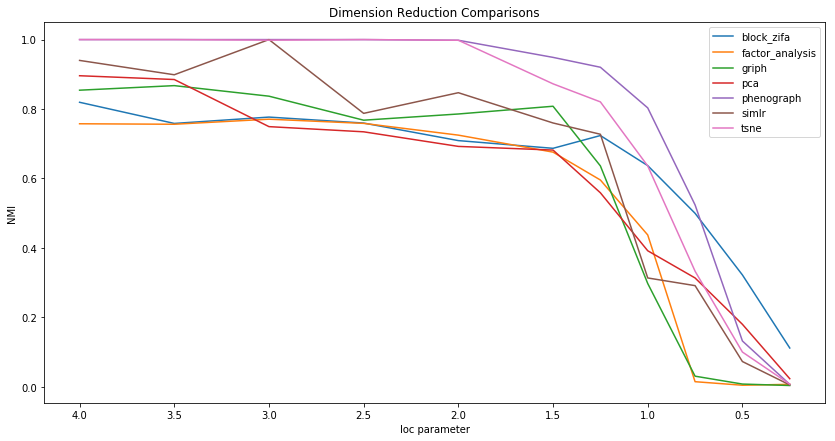

In [15]:
ax = df.plot(title='Dimension Reduction Comparisons',figsize=(14,7))
ax.set_xlabel('loc parameter')
ax.set_ylabel('NMI')
ax.invert_xaxis()